In [56]:
import numpy as np
import pandas as pd

# SMOTE Algorithm


In [57]:
def smote(X,y,N,k):
  sample = get_minority_samples(X,y)
  T = len(sample)                         # number of minority class samples

  if (N < 100):
    np.random.shuffle(sample)             # randomize the T minority class sample
    T = int(N/100 * T)
    N = 100

  N = int(N/100)
  numattrs = sample.shape[1]              # number of attributes/features
  synthetic = np.empty((N*T,numattrs))

  for i in range(T):
    distances = np.empty((0,2),float)
    for j in range(T):
      if (i!=j):
        distance = euclidean_distance(sample[i],sample[j])
        distances = np.append(distances,np.array([[j,distance]]),axis = 0)
    distances = distances[distances[:,1].argsort()]
    nnarray = distances[:,0].astype(int)
    populate(N,i,nnarray[:k],k,numattrs,sample,synthetic)

  return synthetic

In [58]:
def euclidean_distance(point1,point2):
      try:
        n = len(point1)
        distance = 0
        for i in range(n):
          distance += (point1[i] - point2[i])**2
        return np.sqrt(distance)
      except Exception as e:                                       # Raise Exception if point1 and point2 are of different dimension
        print(f'Exception: {type(e).__name__} - {e}')


In [59]:
def populate(N,i,nnarray,k,numattrs,sample,synthetic):
  newindex = 0                                                     # keeps count of number of synthetic samples generated
  while(N != 0):
    nn = np.random.randint(0,k)
    for attr in range(numattrs):
      dif = sample[nnarray[nn]][attr] - sample[i][attr]
      gap = np.random.randint(0,2)
      synthetic[newindex][attr] = sample[i][attr] + gap * dif
    newindex = newindex+1
    N = N - 1

In [69]:
def get_minority_samples(X,y):
  N = len(X)                                                # total number of samples
  majority_class = y.mode()[0]                              # majority class
  # minority_n = N - y.describe()[majority_class]           # Original line causing TypeError
  majority_count = y.value_counts()[majority_class]
  minority_n = int(N - majority_count)


  d = X.shape[1]                                            # number of features
  sample = np.empty((minority_n,d))                         # array for original majority class
  j = 0
  for i in range(N):
        if(y.iloc[i] != majority_class):
           sample[j] = np.array(X.iloc[i])
           j=j+1
  return sample

# Mammography Dataset

In [61]:
data = pd.read_csv('mammography.csv',header = None)       # load data

X = data.iloc[:,:-1]                                      # mammography.data
y = data.iloc[:,-1].str.strip("'\"").astype(int)                                       # mammography.target

## Logistic Regression before generating synthetic data

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4,stratify = y)


In [63]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

print(((predictions == y_test).sum())/len(X_test)*100)

98.12248547161377


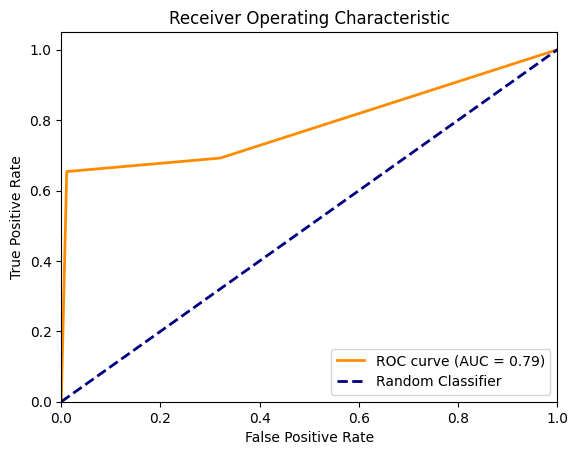

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Your existing code
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Get probability predictions for the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [87]:
print(type(X))
synthetic_data = pd.DataFrame(smote(X,y,100,5))
print(synthetic_data.shape)
print(type(synthetic_data))
smote_X = pd.concat([X,synthetic_data])
y_concat = pd.Series(y.value_counts().idxmin(), index=range(len(synthetic_data)))
print(type(y_concat))

<class 'pandas.core.frame.DataFrame'>
(260, 6)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
